## Features
- price: price in USD
- carat: weight of the diamond
- cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)
- color: diamond colour, from J (worst) to D (best)
- clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
- x: length in mm
- y: width in mm
- z: depth in mm
- depth: total depth percentage
- table: width of top of diamond relative to widest point
- city: city where the diamonds is reported to be sold.
- id: only for test & sample submission files, id for prediction sample identification

## Info:
- D: incoloro
- E: incoloro
- F: Incoloro
- G: Casi incoloro
- H: Casi incolor 
- I: Casi inicoloro
- J: Casi incoloro
## Cut:calidad de cortye
x longitud
y altura
z profundidad interna


## Diamond examples:
### Diamond 1:
- Depth = 61'8
- Table = 58'0
- Price = 8497 Dollars
### Diamond 2:
- Depth = 67,8
- Table = Nan
- Price = 4809 Dollars


### Diamond 3:
- Depth = Nan
- Table = 66%
- Price = 4879 Dollars
    

Diamonds with the depth & table between 55 and 65 are more brilliant  

In [1]:
# imports

import pandas as pd
import numpy as np
from scipy.stats import trim_mean   # conda install scipy
#from statsmodels import robust      # conda install -c conda-forge statsmodels 
import wquantiles                   # pip install wquantiles

import seaborn as sns
import matplotlib.pylab as plt

ModuleNotFoundError: No module named 'statsmodels'

In [2]:
diamonds_train_df = pd.read_csv("..\data\diamonds_train.csv")

In [4]:
diamonds_train_df

,price,carat,city,depth,table,x,y,z,cut,color,clarity
0,4268,1.21,Dubai,62.4,58.0,6.83,6.79,4.25,Premium,J,VS2
1,505,0.32,Kimberly,63.0,57.0,4.35,4.38,2.75,Very Good,H,VS2
2,2686,0.71,Las Vegas,65.5,55.0,5.62,5.53,3.65,Fair,G,VS1
3,738,0.41,Kimberly,63.8,56.0,4.68,4.72,3.00,Good,D,SI1
4,4882,1.02,Dubai,60.5,59.0,6.55,6.51,3.95,Ideal,G,SI1
...,...,...,...,...,...,...,...,...,...,...,...
40450,10070,1.34,Antwerp,62.7,57.0,7.10,7.04,4.43,Ideal,G,VS1
40451,12615,2.02,Madrid,57.1,60.0,8.31,8.25,4.73,Good,F,SI2
40452,5457,1.01,Kimberly,62.7,56.0,6.37,6.42,4.01,Ideal,H,SI1
40453,456,0.33,Kimberly,61.9,54.3,4.45,4.47,2.76,Ideal,J,VS1


## CATEGORICAL DATA(sacar la moda):
- City
- Cut
- Clarity
- Color
## NUMERIC DATA(sacar la media, la desviacion estandar, la mediana, minimo máximo...):
- Price
- Carat
- Depth
- Table
- x
- y
- z


## Discrete variables: carat, depth, table x, y, z
## Continuous variables: price

In [5]:
mean_price = diamonds_train_df['price'].mean()
max_price = diamonds_train_df['price'].max()
min_price = diamonds_train_df['price'].min()
median_price = diamonds_train_df['price'].median()
std_price = diamonds_train_df['price'].std()


print("Mean Price: ")
print(mean_price)
print("Max Price:")
print(max_price)
print("Min Price:")
print(min_price)
print("Median price: ")
print(median_price)
print("Desviacion estándar precio: ")
print(std_price)

mean_depth = diamonds_train_df['depth'].mean()
max_depth = diamonds_train_df['depth'].max()
min_depth = diamonds_train_df['depth'].min()
median_depth = diamonds_train_df['depth'].median()
std_depth = diamonds_train_df['depth'].std()

print("Mean Depth: ")
print(mean_depth)
print("Max Depth:")
print(max_depth)
print("Min Depth:")
print(min_depth)
print("Median Depth: ")
print(median_depth)
print("Desviacion estándar Depth: ")
print(std_depth)


total_cities = diamonds_train_df['city'].unique()
total_clarity = diamonds_train_df['clarity'].unique()
total_cut = diamonds_train_df['cut'].unique()
total_color = diamonds_train_df['color'].unique()

print("Total cities: ")
print(total_cities)
print("Total clarity: ")
print(total_clarity)
print("Total cut: ")
print(total_cut)
print("Total color: ")
print(total_color)

Mean Price: 
3928.444469163268
Max Price:
18823
Min Price:
326
Median price: 
2397.0
Desviacion estándar precio: 
3992.4161466170613
Mean Depth: 
61.752841428748
Max Depth:
79.0
Min Depth:
43.0
Median Depth: 
61.8
Desviacion estándar Depth: 
1.4317253979077107
Total cities: 
['Dubai' 'Kimberly' 'Las Vegas' 'Tel Aviv' 'Amsterdam' 'Zurich' 'Antwerp'
 'Madrid' 'Paris' 'Surat' 'Luxembourg' 'London' 'New York City']
Total clarity: 
['VS2' 'VS1' 'SI1' 'SI2' 'IF' 'VVS1' 'VVS2' 'I1']
Total cut: 
['Premium' 'Very Good' 'Fair' 'Good' 'Ideal']
Total color: 
['J' 'H' 'G' 'D' 'F' 'E' 'I']


In [6]:
mean_table = diamonds_train_df['table'].mean()
max_table = diamonds_train_df['table'].max()
min_table = diamonds_train_df['table'].min()
median_table = diamonds_train_df['table'].median()
std_table = diamonds_train_df['table'].std()

print("Mean table:")
print(mean_table)
print("Max table:")
print(max_table)
print("Min table:")
print(min_table)
print("Median table: ")
print(median_table)
print("Desviacion estándar table: ")
print(std_table)


mean_carat = diamonds_train_df['carat'].mean()
max_carat = diamonds_train_df['carat'].max()
min_carat = diamonds_train_df['carat'].min()
median_carat = diamonds_train_df['carat'].median()
std_carat = diamonds_train_df['carat'].std()
print("Mean carat:")
print(mean_carat)
print("Max carat:")
print(max_carat)
print("Min carat:")
print(min_carat)
print("Median carat:")
print(median_carat)
print("Desviacion estándar carat:")
print(std_carat)

mean_x = diamonds_train_df['x'].mean()
max_x = diamonds_train_df['x'].max()
min_x = diamonds_train_df['x'].min()
median_x = diamonds_train_df['x'].median()
std_x = diamonds_train_df['x'].std()

print("mean x:")
print(mean_x)
print("max x:")
print(max_x)
print("min x:")
print(min_x)
print("Median x:")
print(median_x)
print("Desviacion estándar x:")
print(std_x)




mean_y = diamonds_train_df['y'].mean()
max_y = diamonds_train_df['y'].max()
min_y = diamonds_train_df['y'].min()
median_y = diamonds_train_df['y'].median()
std_y = diamonds_train_df['y'].std()

print("mean y:")
print(mean_y)
print("max y:")
print(max_y)
print("min y:")
print(min_y)
print("Median y:")
print(median_y)
print("Desviacion estándar y:")
print(std_y)


mean_z = diamonds_train_df['z'].mean()
max_z = diamonds_train_df['z'].max()
min_z = diamonds_train_df['z'].min()
median_z = diamonds_train_df['z'].median()
std_z = diamonds_train_df['z'].std()


print("mean z:")
print(mean_z)
print("max z:")
print(max_z)
print("min z:")
print(min_z)
print("Median z:")
print(median_z)
print("Desviacion estándar z:")
print(std_z)


Mean table:
57.446132740081566
Max table:
95.0
Min table:
43.0
Median table: 
57.0
Desviacion estándar table: 
2.2335352685810945
Mean carat:
0.7977055988134963
Max carat:
4.5
Min carat:
0.2
Median carat:
0.7
Desviacion estándar carat:
0.47554421532468527
mean x:
5.729391669756519
max x:
10.23
min x:
0.0
Median x:
5.69
Desviacion estándar x:
1.124452692618594
mean y:
5.732818687430478
max y:
58.9
min y:
0.0
Median y:
5.71
Desviacion estándar y:
1.146649896091256
mean z:
3.5371536274873314
max z:
8.06
min z:
0.0
Median z:
3.52
Desviacion estándar z:
0.6970615911262161


In [7]:
city_price = diamonds_train_df.groupby(['city'])[['price']].max()
color_price = diamonds_train_df.groupby(['color'])[['price']].max()
clarity_price = diamonds_train_df.groupby(['clarity'])[['price']].max()




In [8]:
city_price # Diamante más caro por ciudad. Más caro -> Kimberly . Más barato -> Dubai

,price
city,
Amsterdam,18795
Antwerp,18791
Dubai,18531
Kimberly,18823
Las Vegas,18741
London,18780
Luxembourg,18759
Madrid,18818
New York City,18806


In [9]:
color_price # Diamante más caro por color. Mas caro ->  I. Más barato -> D.

,price
color,
D,18693
E,18731
F,18791
G,18818
H,18795
I,18823
J,18710


In [10]:
clarity_price # Diamante más caro por claridad. Mas caro -> VS2. Más barato ->  I1.

,price
clarity,
I1,18531
IF,18806
SI1,18818
SI2,18791
VS1,18795
VS2,18823
VVS1,18777
VVS2,18718


## CORRELATION

In [11]:
price_depth = diamonds_train_df["price"].corr(diamonds_train_df["depth"])
price_table = diamonds_train_df["price"].corr(diamonds_train_df["table"])
price_carat = diamonds_train_df["price"].corr(diamonds_train_df["carat"])

price_x = diamonds_train_df["price"].corr(diamonds_train_df["x"])
price_y = diamonds_train_df["price"].corr(diamonds_train_df["y"])
price_z = diamonds_train_df["price"].corr(diamonds_train_df["z"])


print("Correlation Price-Depth: ")
print(price_depth)

print("Correlation Price-Table: ")
print(price_table)

print("Correlation Price-Carat: ")
print(price_carat)

print("Correlation Price-x: ")
print(price_x)

print("Correlation Price-y: ")
print(price_y)

print("Correlation Price-z: ")
print(price_z)

Correlation Price-Depth: 
-0.014864269575236637
Correlation Price-Table: 
0.13011052361893974
Correlation Price-Carat: 
0.9219351745876566
Correlation Price-x: 
0.8858479443767826
Correlation Price-y: 
0.8661632281914156
Correlation Price-z: 
0.8745004883098203


In [12]:
# Calcular estadísticas de las variables categóricas(moda)

mode_cities = diamonds_train_df['city'].mode()
mode_clarity = diamonds_train_df['clarity'].mode()
mode_cut = diamonds_train_df['cut'].mode()
mode_color = diamonds_train_df['color'].mode()

print("Moda city: ")
print(mode_cities)
print("Moda clarity: ")
print(mode_clarity)
print("Moda cut: ")
print(mode_cut)
print("Moda color: ")
print(mode_color)


Moda city: 
0    Surat
Name: city, dtype: object
Moda clarity: 
0    SI1
Name: clarity, dtype: object
Moda cut: 
0    Ideal
Name: cut, dtype: object
Moda color: 
0    G
Name: color, dtype: object


# GRAPHICS

## BOXPLOT

### Parte central boxplot: mediana
### Caja: entre el 2º y 3º cuartil
### Bigotes: entre el 1º y 2º y entre el 3º y 4º
### Outliers todo dato que se salga del 1º y del 4º

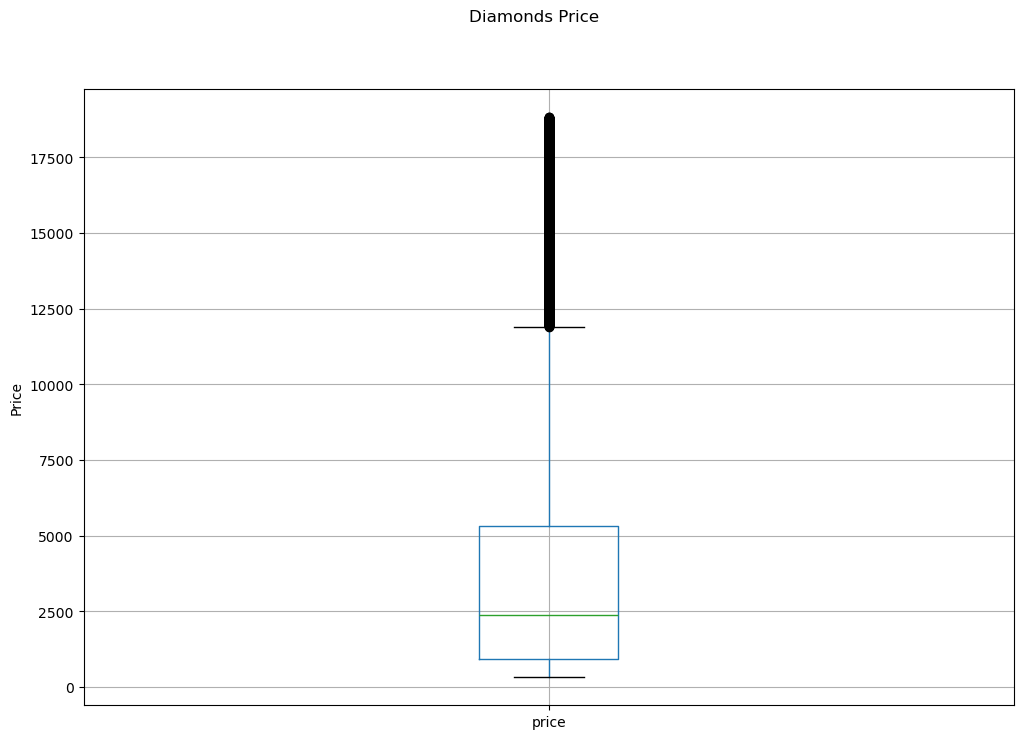

In [13]:
ax_boxplot = diamonds_train_df.boxplot(column='price',figsize=(12,8))
ax_boxplot.set_xlabel('')
ax_boxplot.set_ylabel('Price')
plt.suptitle('Diamonds Price')
plt.show()

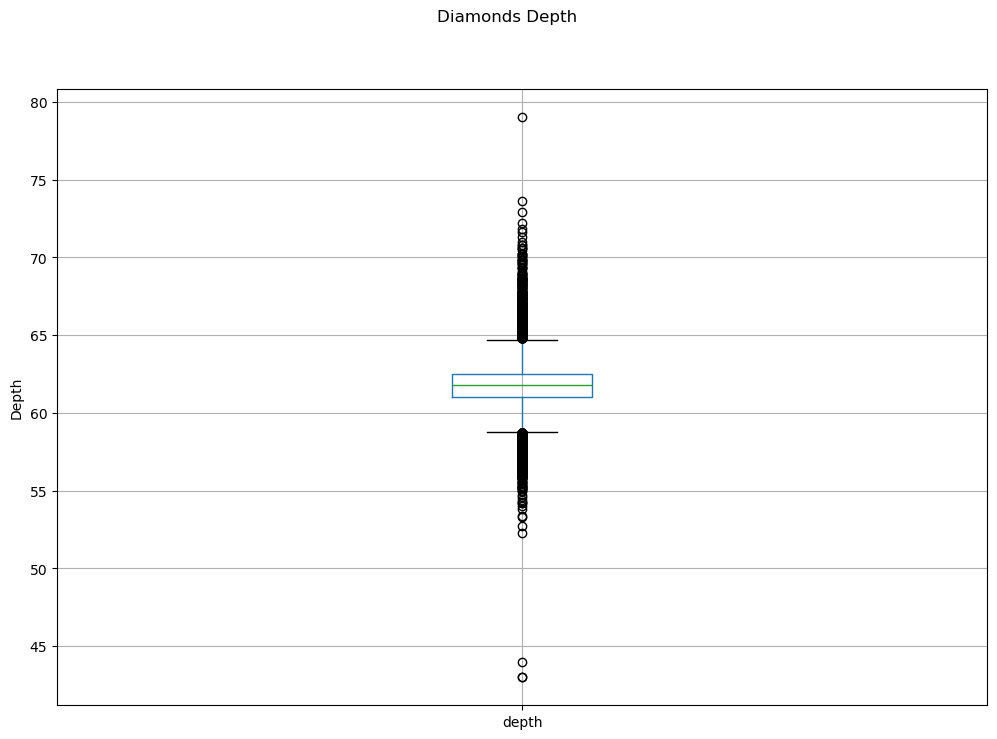

In [14]:
ax_boxplot = diamonds_train_df.boxplot(column='depth',figsize=(12,8))
ax_boxplot.set_xlabel('')
ax_boxplot.set_ylabel('Depth')
plt.suptitle('Diamonds Depth')
plt.show()

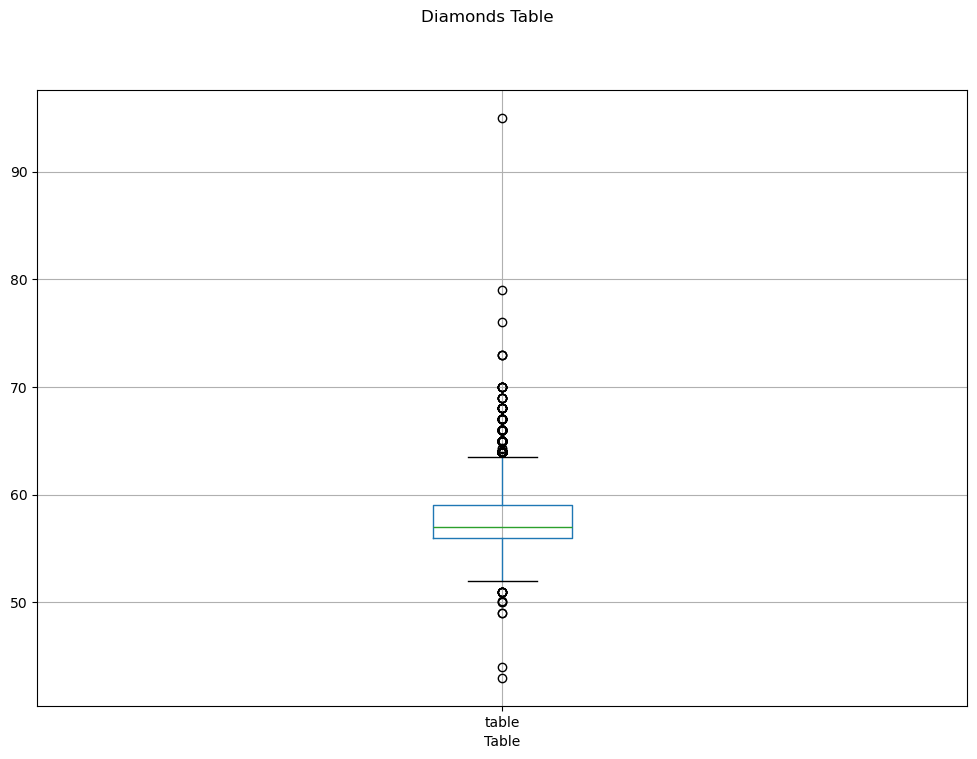

In [15]:
ax_boxplot = diamonds_train_df.boxplot(column='table',figsize=(12,8))
ax_boxplot.set_xlabel('Table')
ax_boxplot.set_ylabel('')
plt.suptitle('Diamonds Table')
plt.show()

## Historygram

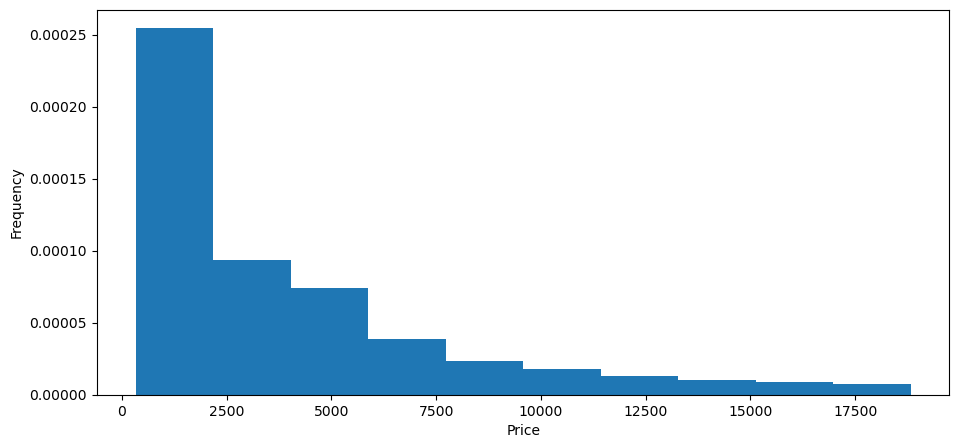

In [20]:
ax_history = diamonds_train_df["price"].plot.hist(density=True,figsize=(11,5))
ax_history.set_xlabel('Price')

plt.show()

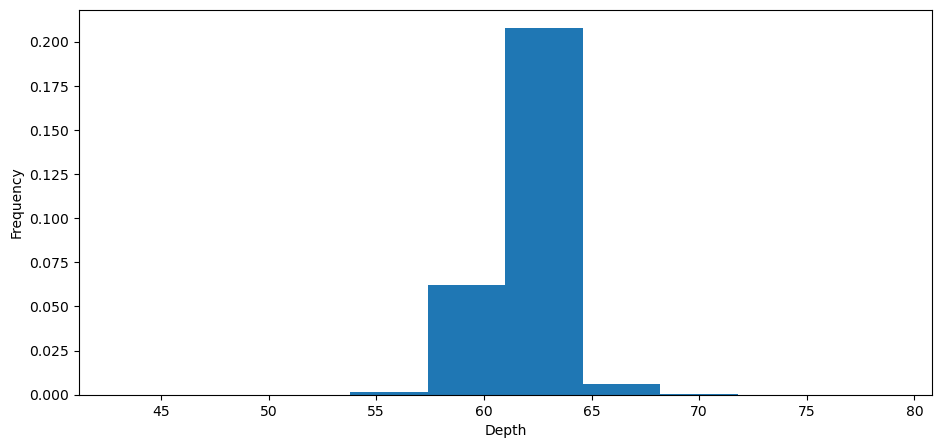

In [39]:
ax_history = diamonds_train_df["depth"].plot.hist(density=True,figsize=(11,5))
ax_history.set_xlabel('Depth')

plt.show()

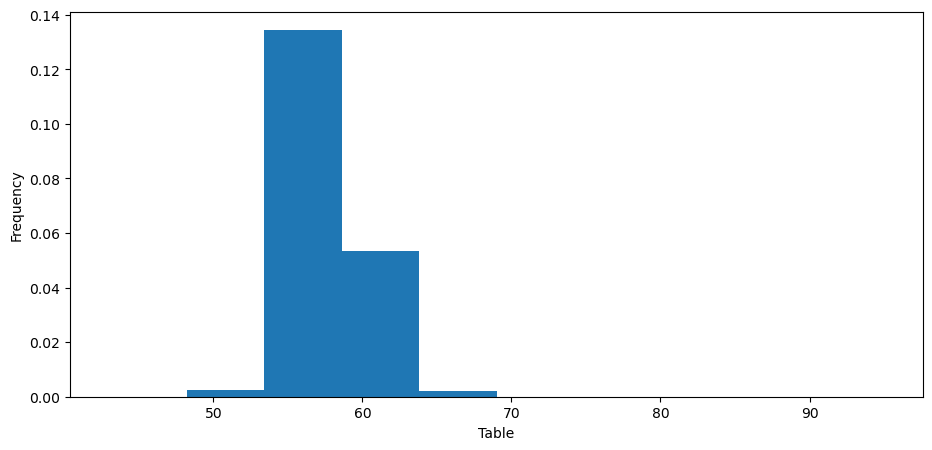

In [40]:
ax_history = diamonds_train_df["table"].plot.hist(density=True,figsize=(11,5))
ax_history.set_xlabel('Table')

plt.show()

## Scatter plot

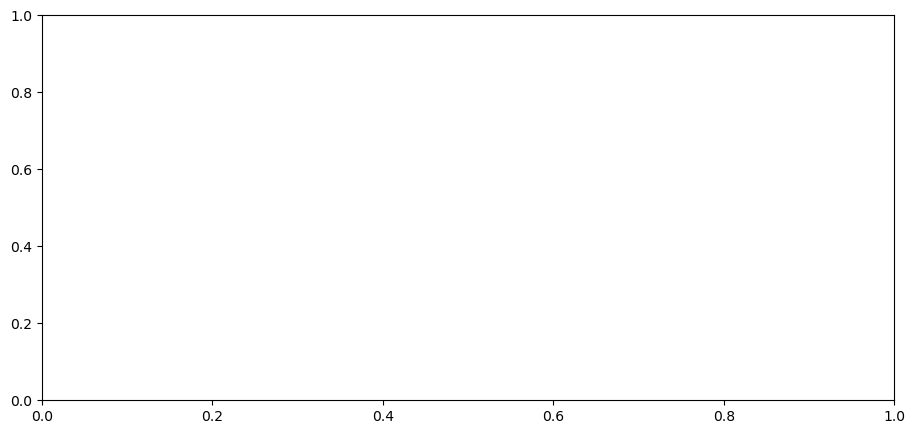

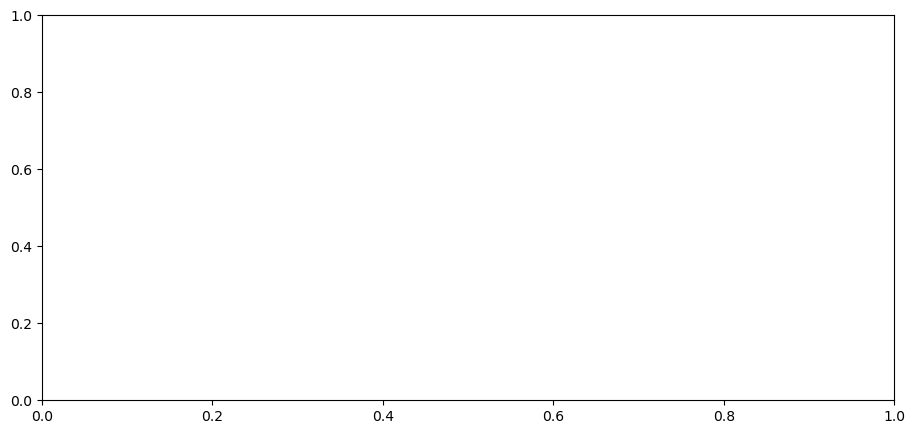

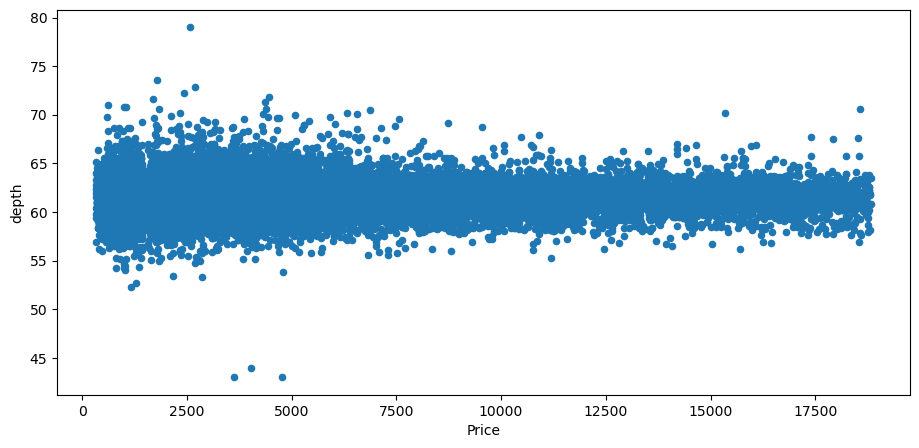

In [37]:
ax_history = diamonds_train_df.plot.scatter(x="price",y="depth",figsize=(11,5))
ax_history.set_xlabel('Price')
ax_history.set_ylabel('Depth')
plt.show()

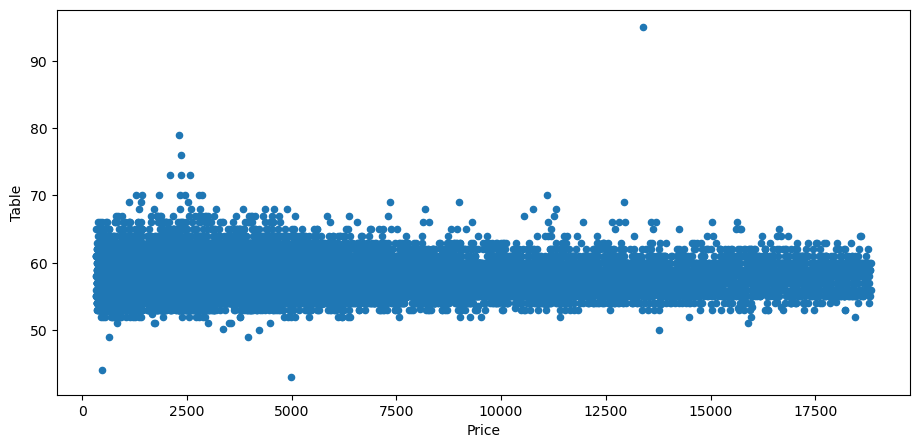

In [38]:
ax_history = diamonds_train_df.plot.scatter(x="price",y="table",figsize=(11,5))
ax_history.set_xlabel('Price')
ax_history.set_ylabel('Table')


plt.show()

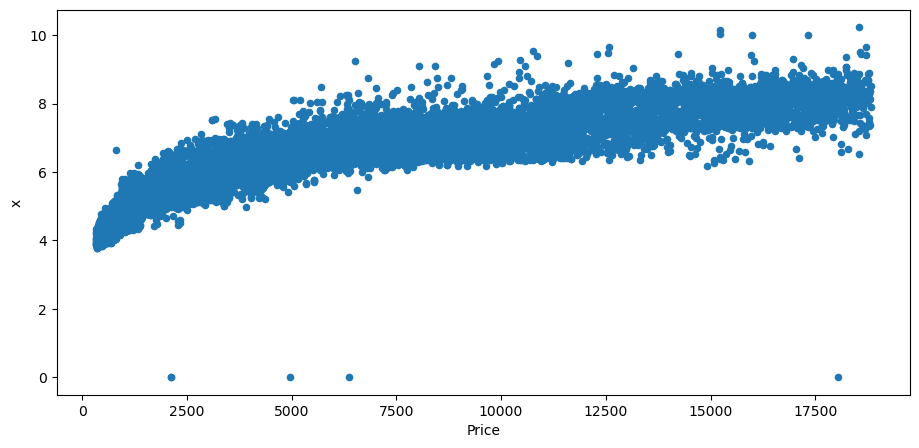

In [41]:
ax_history = diamonds_train_df.plot.scatter(x="price",y="x",figsize=(11,5))
ax_history.set_xlabel('Price')
ax_history.set_ylabel('x')


plt.show()

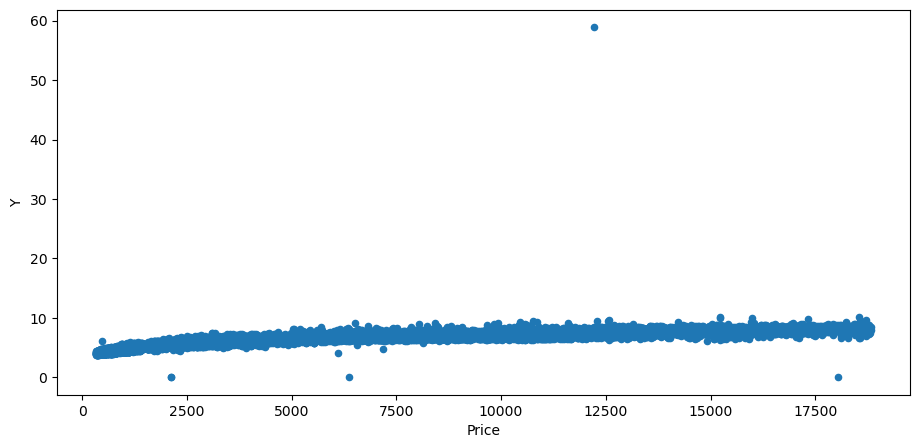

In [44]:
ax_history = diamonds_train_df.plot.scatter(x="price",y="y",figsize=(11,5))
ax_history.set_xlabel('Price')
ax_history.set_ylabel('Y')


plt.show()

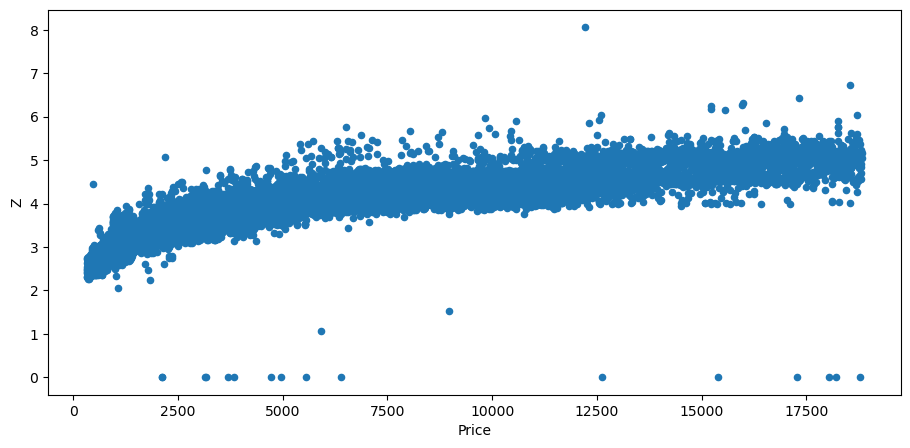

In [45]:
ax_history = diamonds_train_df.plot.scatter(x="price",y="z",figsize=(11,5))
ax_history.set_xlabel('Price')
ax_history.set_ylabel('Z')


plt.show()